# 규제가 있는 선형회귀 - 릿지, 라쏘, 엘라스틱넷 회귀

#### 규제가 있는 모델 구축 - 당뇨병 데이터세트
#### 1. 데이터 전처리
#### 2. Ridge, Lasso, Elasticnet regression 구축: 회귀 계수 확인, 하이퍼 파라미터 탐색
#### 3. 교차 검증으로 최적의 하이퍼파라미터 탐색: LassoCV()

In [1]:
# 관련 라이브러리 및 모듈 Import
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

# 0. 데이터 수집, 탐색, 준비

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

diab = load_diabetes()


####  데이터셋에 대한 설명 및 정보 확인

In [4]:
# 데이터셋 정보확인

In [5]:
print(diab.DESCR) #이미 스케일링 되어 있음을 확인할 것

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [6]:
diab.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [7]:
diab.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

#### 데이터프레임 변환

In [8]:
# 독립변수(피처)와 종속변수를 DataFrame자료형으로 변환

In [26]:
# 데이터셋 객체의 data 배열, 즉, 독립변수 X가되는 피처(특성)들을 DataFrame자료형으로 변환하여
# diab_df생성
# diab_df.head() 데이터 5개 확인

diab_df = pd.DataFrame(diab.data, columns = diab.feature_names)
diab_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [10]:
diab_df.shape

(442, 10)

In [11]:
diab_df.info() # 누락치 확인,  data type 확인 ->  isnull().sum(), target에 결측값이 있으면 해당 관측치 제거

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


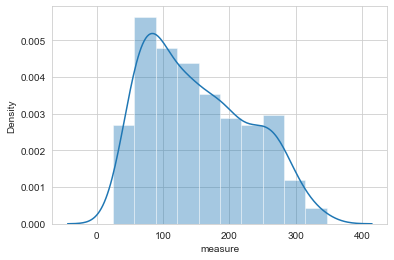

In [14]:
import seaborn as sns
sns.set_style('whitegrid')
f = sns.distplot(diab_df['measure'])


In [29]:
# X(독립변수), Y(종속변수) 분할
X = diab_df.drop(['measure'], axis=1)
y = diab_df['measure']

In [30]:
# 학습용, 평가용 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3,random_state=42)

# 모델별 계수변화, 알파별 계수 비교 데이터프레임(comp_df)

In [31]:
#각 모델별 계수로 이루어진 데이터프레임 준비
comp_df = pd.DataFrame(index=(diab.feature_names) + ["score"])

In [32]:
#각 모델별, 규제강도별 평가지표 저장
diab.feature_names + ["score"]

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'score']

In [33]:
comp_df

""
age
sex
bmi
bp
s1
s2
s3
s4
s5
s6


# 1. 규제가 없는 선형모델

In [34]:
#모델 구축 및 학습
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

#모델 평가
y_pred = model_LR.predict(X_test)
r2 = r2_score(y_test, y_pred)

# 회귀 계수 확인
coef = pd.Series(model_LR.coef_, index=X_test.columns)

print("R2: {:.3f} \n".format(r2))
print(coef)

R2: 0.477 

age     29.250346
sex   -261.707681
bmi    546.297373
bp     388.400773
s1    -901.953387
s2     506.761149
s3     121.148459
s4     288.029325
s5     659.271338
s6      41.375369
dtype: float64


- 계수값 시각화

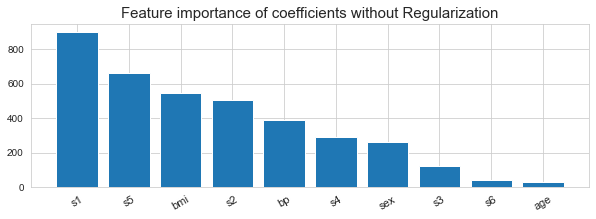

In [35]:
coef = pd.Series(data=np.abs(model_LR.coef_), index=X_test.columns).sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10, 3))
plt.title('Feature importance of coefficients without Regularization', fontsize=15)
plt.bar(coef.index, coef.values, align='center')
plt.xticks(coef.index, rotation=30, fontsize=11)
plt.show()

In [36]:
# 모델별 비교 데이터프레임 열 추가
comp_df['LR'] = np.append(model_LR.coef_, r2 )
comp_df

,LR
age,29.250346
sex,-261.707681
bmi,546.297373
bp,388.400773
s1,-901.953387
s2,506.761149
s3,121.148459
s4,288.029325
s5,659.271338
s6,41.375369


# 1. 릿지 모델

In [24]:
# 릿지 선형회귀 모델 평가: model_Ridge1, alpha=1

# a=1일때 회귀 계수 확인


- 계수값 시각화

In [25]:
coef = pd.Series(data=np.abs(model_Ridge1.coef_), index=X_test.columns).sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10, 3))
plt.title('Feature importance of coefficients in Ridge(alpha=1)', fontsize=15)
plt.bar(coef.index, coef.values, align='center')
plt.xticks(coef.index, rotation=30, fontsize=11)
plt.show()

NameError: name 'model_Ridge1' is not defined

In [ ]:
# alpha_list=[0.01, 1, 10, 100]인 경우



# 2. 라쏘 모델

In [ ]:
# 라쏘 선형회귀 모델 평가(alpha=1)


- 계수 시각화

In [ ]:
coef = pd.Series(data=np.abs(model_Lasso1.coef_), index=X_test.columns).sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10, 3))
plt.title('Feature importance of coefficients in Lasso(alpha=1)', fontsize=15)
plt.bar(coef.index, coef.values, align='center')
plt.xticks(coef.index, rotation=30, fontsize=11)
plt.show()

In [ ]:
# alpha_list=[0.01, 1, 10, 100]인 경우


# 3. 엘라스틱넷 모델

In [ ]:

# 모델 구축 및 학습(alpha=1, l1_ratio=0.5)


In [ ]:
#모델 평가 및 회귀 계수 확인


- 계수 시각화

In [ ]:
coef = pd.Series(data=np.abs(model_ElasticNet1.coef_), index=X_test.columns).sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10, 3))
plt.title('Feature importance of coefficients in ElasticNet(alpha=1, l1_ratio=0.5)', fontsize=15)
plt.bar(coef.index, coef.values, align='center')
plt.xticks(coef.index, rotation=30, fontsize=11)
plt.show()

In [ ]:
# 엘라스틱넷 선형회귀 모델 평가(alpha=1)



### LassoCV() : k-폴드 교차 검증으로 최적의 Lasso 모델 하이퍼파라미터 alpha 찾기

In [ ]:
#LassoCV()에 필요한 매개변수 설정
#0.01 ~ 9.91 까지 alpha_list  생성

cv = 5
max_iter = 5000
alpha_list = np.arange(0.01, 10, 0.1)


- 모델 학습

In [ ]:
model_Lasso = LassoCV(alphas=alpha_list, cv=cv, n_jobs=-1, random_state=1, max_iter=max_iter)
model_Lasso.fit(X_train, y_train)

In [ ]:
model_Lasso.alpha_